## Example: depolarzing noise model

In [5]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_distribution
import qiskit_aer.noise as noise

In [39]:
# Error probabilities
prob_1 = 0.001  # 1-qubit gate
prob_2 = 0.01   # 2-qubit gate

# Depolarizing quantum errors
error_1 = noise.depolarizing_error(prob_1, 1)
error_2 = noise.depolarizing_error(prob_2, 2)

# Add errors to noise model
noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(error_1, ['u1', 'u2', 'u3'])
noise_model.add_all_qubit_quantum_error(error_2, ['cx'])

print(noise_model)

# Get basis gates from noise model
basis_gates = noise_model.basis_gates

# Make a circuit
circ = QuantumCircuit(3, 3)
circ.h(0)
circ.cx(0, 1)
circ.cx(1, 2)
circ.measure([0, 1, 2], [0, 1, 2])
circ.draw()

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['u2', 'cx', 'u3', 'u1']
  All-qubits errors: ['u1', 'u2', 'u3', 'cx']


┌───┐          ┌─┐      
q_0: ┤ H ├──■───────┤M├──────
     └───┘┌─┴─┐     └╥┘┌─┐   
q_1: ─────┤ X ├──■───╫─┤M├───
          └───┘┌─┴─┐ ║ └╥┘┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     0  1  2

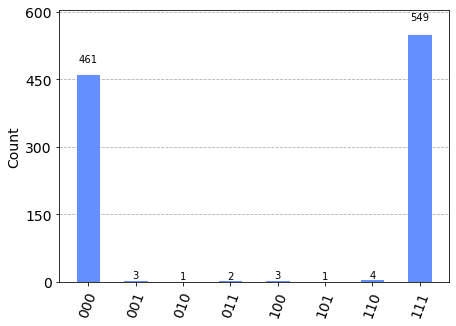

In [40]:
# Perform a noise simulation
result = execute(circ, Aer.get_backend('qasm_simulator'),
                 basis_gates=basis_gates,
                 noise_model=noise_model).result()
counts = result.get_counts(0)
plot_histogram(counts)

## 2-Qubit GHZ

In [2]:
# Error probabilities
prob = 0.01   # 2-qubit gate

# Depolarizing quantum errors
error = noise.depolarizing_error(prob, 2)

# Add errors to noise model
noise_model_GHZ_2Q = noise.NoiseModel()
noise_model_GHZ_2Q.add_all_qubit_quantum_error(error, ['cx'])

print(noise_model_GHZ_2Q)

# Get basis gates from noise model
basis_gates_GHZ_2Q = noise_model_GHZ_2Q.basis_gates

# Make a circuit
GHZ_2Q = QuantumCircuit(2, 2)
GHZ_2Q.h(0)
GHZ_2Q.cx(0, 1)
GHZ_2Q.barrier()
GHZ_2Q.measure([0, 1], [0, 1])
GHZ_2Q.draw()

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['cx']
  All-qubits errors: ['cx']


┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

{'11': 530, '00': 489, '01': 2, '10': 3}


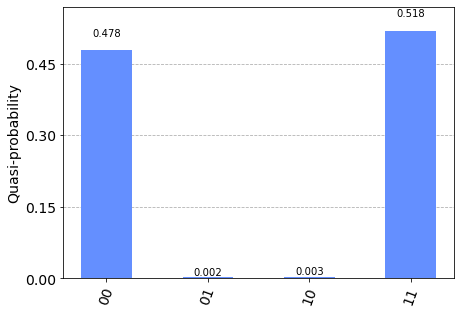

In [6]:
# Perform a noise simulation
result = execute(GHZ_2Q, Aer.get_backend('qasm_simulator'),
                 basis_gates=basis_gates_GHZ_2Q,
                 noise_model=noise_model_GHZ_2Q).result()
counts_GHZ_2Q = result.get_counts()
print(counts_GHZ_2Q)
plot_distribution(counts_GHZ_2Q)

In [8]:
from numpy import pi

# Make a circuit
GHZ_2Q_ER = QuantumCircuit(4, 4)

# Logical Hadamard
GHZ_2Q_ER.h(1)
GHZ_2Q_ER.cry(pi,1,0)
GHZ_2Q_ER.h(0)
GHZ_2Q_ER.h(1)

# Logical CX
GHZ_2Q_ER.cx(0, 3)

# Error Rejection
GHZ_2Q_ER.cx(0, 2)
GHZ_2Q_ER.cx(1, 2)

GHZ_2Q_ER.barrier()
GHZ_2Q_ER.measure(range(4),range(4))
GHZ_2Q_ER.draw()

┌───────┐┌───┐                ░ ┌─┐         
q_0: ─────┤ Ry(π) ├┤ H ├──■────■────────░─┤M├─────────
     ┌───┐└───┬───┘├───┤  │    │        ░ └╥┘┌─┐      
q_1: ┤ H ├────■────┤ H ├──┼────┼────■───░──╫─┤M├──────
     └───┘         └───┘  │  ┌─┴─┐┌─┴─┐ ░  ║ └╥┘┌─┐   
q_2: ─────────────────────┼──┤ X ├┤ X ├─░──╫──╫─┤M├───
                        ┌─┴─┐└───┘└───┘ ░  ║  ║ └╥┘┌─┐
q_3: ───────────────────┤ X ├───────────░──╫──╫──╫─┤M├
                        └───┘           ░  ║  ║  ║ └╥┘
c: 4/══════════════════════════════════════╩══╩══╩══╩═
                                           0  1  2  3

{'1011': 474, '0000': 526, '0001': 2, '1110': 5, '1111': 3, '0110': 2, '0011': 1, '1101': 3, '0010': 2, '0101': 2, '0100': 3, '1001': 1}


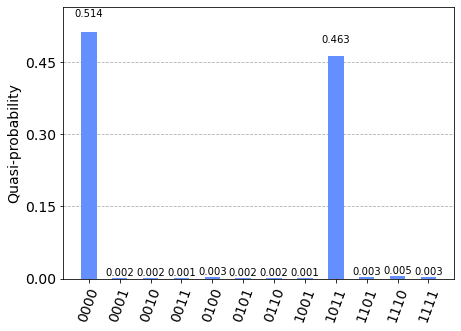

In [9]:
# Perform a noise simulation
result = execute(GHZ_2Q_ER, Aer.get_backend('qasm_simulator'),
                 basis_gates=basis_gates_GHZ_2Q,
                 noise_model=noise_model_GHZ_2Q).result()
counts_GHZ_2Q_ER = result.get_counts(0)
print(counts_GHZ_2Q_ER)
plot_distribution(counts_GHZ_2Q_ER)

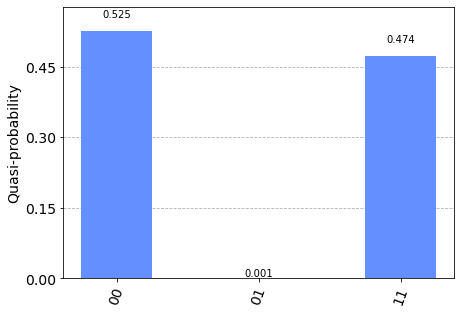

In [11]:
counts_GHZ_2Q_ER = {'11': 474, '00': 526, '01': 1}
plot_distribution(counts_GHZ_2Q_ER)

## 3-Qubit GHZ

In [13]:
# Error probabilities
prob = 0.01   # 2-qubit gate

# Depolarizing quantum errors
error = noise.depolarizing_error(prob, 2)

# Add errors to noise model
noise_model_GHZ_3Q = noise.NoiseModel()
noise_model_GHZ_3Q.add_all_qubit_quantum_error(error, ['cx'])

print(noise_model_GHZ_3Q)

# Get basis gates from noise model
basis_gates_GHZ_3Q = noise_model_GHZ_3Q.basis_gates

# Make a circuit
GHZ_3Q = QuantumCircuit(3, 3)
GHZ_3Q.h(0)
GHZ_3Q.cx(0, 1)
GHZ_3Q.cx(0, 2)
GHZ_3Q.barrier()
GHZ_3Q.measure(range(3), range(3))
GHZ_3Q.draw()

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['cx']
  All-qubits errors: ['cx']


┌───┐           ░ ┌─┐      
q_0: ┤ H ├──■────■───░─┤M├──────
     └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
q_1: ─────┤ X ├──┼───░──╫─┤M├───
          └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
q_2: ──────────┤ X ├─░──╫──╫─┤M├
               └───┘ ░  ║  ║ └╥┘
c: 3/═══════════════════╩══╩══╩═
                        0  1  2

{'000': 512, '111': 495, '110': 4, '001': 2, '010': 4, '101': 3, '100': 2, '011': 2}


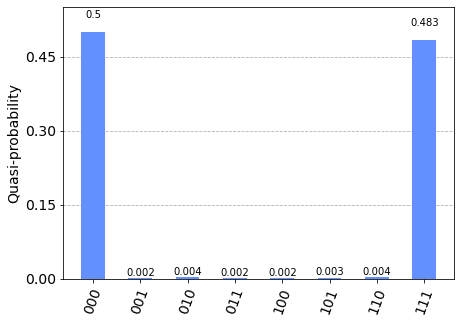

In [14]:
# Perform a noise simulation
result = execute(GHZ_3Q, Aer.get_backend('qasm_simulator'),
                 basis_gates=basis_gates_GHZ_3Q,
                 noise_model=noise_model_GHZ_3Q).result()
counts_GHZ_3Q = result.get_counts()
print(counts_GHZ_3Q)
plot_distribution(counts_GHZ_3Q)

In [15]:
from numpy import pi

# Make a circuit
GHZ_3Q_ER = QuantumCircuit(5, 5)

# Logical Hadamard
GHZ_3Q_ER.h(1)
GHZ_3Q_ER.cry(pi,1,0)
GHZ_3Q_ER.h(0)
GHZ_3Q_ER.h(1)

# Logical CX
GHZ_3Q_ER.cx(0, 3)
GHZ_3Q_ER.cx(0, 4)

# Error Rejection
GHZ_3Q_ER.barrier()
GHZ_3Q_ER.cx(0, 2)
GHZ_3Q_ER.cx(1, 2)

GHZ_3Q_ER.barrier()
GHZ_3Q_ER.measure(range(5),range(5))
GHZ_3Q_ER.draw()

┌───────┐┌───┐           ░            ░ ┌─┐            
q_0: ─────┤ Ry(π) ├┤ H ├──■────■───░───■────────░─┤M├────────────
     ┌───┐└───┬───┘├───┤  │    │   ░   │        ░ └╥┘┌─┐         
q_1: ┤ H ├────■────┤ H ├──┼────┼───░───┼────■───░──╫─┤M├─────────
     └───┘         └───┘  │    │   ░ ┌─┴─┐┌─┴─┐ ░  ║ └╥┘┌─┐      
q_2: ─────────────────────┼────┼───░─┤ X ├┤ X ├─░──╫──╫─┤M├──────
                        ┌─┴─┐  │   ░ └───┘└───┘ ░  ║  ║ └╥┘┌─┐   
q_3: ───────────────────┤ X ├──┼───░────────────░──╫──╫──╫─┤M├───
                        └───┘┌─┴─┐ ░            ░  ║  ║  ║ └╥┘┌─┐
q_4: ────────────────────────┤ X ├─░────────────░──╫──╫──╫──╫─┤M├
                             └───┘ ░            ░  ║  ║  ║  ║ └╥┘
c: 5/══════════════════════════════════════════════╩══╩══╩══╩══╩═
                                                   0  1  2  3  4

{'11011': 475, '00000': 517, '00001': 2, '10101': 1, '11110': 3, '01110': 2, '11101': 8, '11111': 2, '01000': 2, '00110': 5, '10000': 1, '00010': 2, '11010': 2, '01011': 1, '00100': 1}


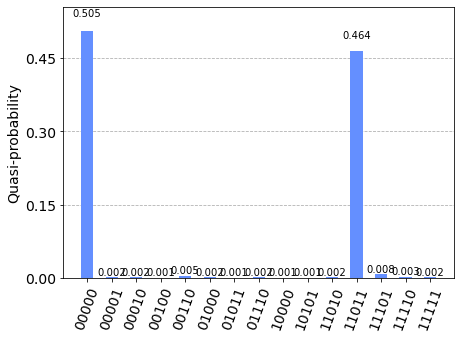

In [16]:
# Perform a noise simulation
result = execute(GHZ_3Q_ER, Aer.get_backend('qasm_simulator'),
                 basis_gates=basis_gates_GHZ_3Q,
                 noise_model=noise_model_GHZ_3Q).result()
counts_GHZ_3Q_ER = result.get_counts(0)
print(counts_GHZ_3Q_ER)
plot_distribution(counts_GHZ_3Q_ER)

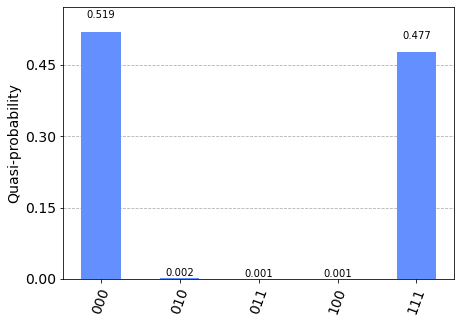

In [17]:
counts_GHZ_3Q_ER = {'111': 475, '000': 517, '010': 2, '100': 1, '011': 1}
plot_distribution(counts_GHZ_3Q_ER)